In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data_all = pd.read_csv('COVID-19 Cases.csv')
data_US = pd.read_csv('cases_us.csv')
data_CO = pd.read_csv('cases_co.csv')
data_W = pd.read_csv('cases_western.csv')
data_E = pd.read_csv('cases_eastern.csv')
data_all.head(1)

,Case_Type,Cases,Difference,Date,Country_Region,Province_State,Admin2,Combined_Key,FIPS,Lat,Long,Table_Names,Prep_Flow_Runtime
0,Deaths,0,0,2/27/2020,Bahamas,NaN,NaN,NaN,NaN,25.0343,-77.3963,Time Series,4/10/2020 8:25:18 PM


In [3]:
weekly = pd.date_range(start='2020-01-22',end='2020-04-10',freq='W')

# Outline:

## Current situation: (which states are suffering)

### Confirmed cases

In [4]:
confirmed_US = data_US[data_US['Case_Type']=='Confirmed']
confirmed_CO = data_CO[data_CO['Case_Type']=='Confirmed']
confirmed_W = data_W[data_W['Case_Type']=='Confirmed']
confirmed_E = data_E[data_E['Case_Type']=='Confirmed']

confirmed daily

In [5]:
confirmed_US_daily = confirmed_US.groupby(['Date'])['Cases'].sum()
confirmed_CO_daily = confirmed_CO.groupby(['Date'])['Cases'].sum()
confirmed_W_daily = confirmed_W.groupby(['Date'])['Cases'].sum()
confirmed_E_daily = confirmed_E.groupby(['Date'])['Cases'].sum()

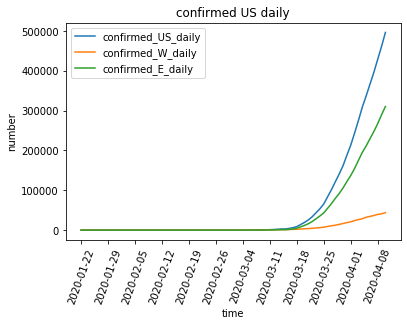

In [6]:
plt.figure()
plt.plot(confirmed_US_daily,label='confirmed_US_daily')
plt.plot(confirmed_W_daily,label='confirmed_W_daily')
plt.plot(confirmed_E_daily,label='confirmed_E_daily')

plt.xlabel("time")
plt.ylabel("number")
plt.title("confirmed US daily")
plt.xticks(range(0,80,7),rotation=70)
plt.legend()

Deaths cases

In [9]:
deaths_US = data_US[data_US['Case_Type']=='Deaths']
deaths_CO = data_CO[data_CO['Case_Type']=='Deaths']
deaths_W = data_W[data_W['Case_Type']=='Deaths']
deaths_E = data_E[data_E['Case_Type']=='Deaths']

In [10]:
deaths_US_daily = deaths_US.groupby(['Date'])['Cases'].sum()
deaths_CO_daily = deaths_CO.groupby(['Date'])['Cases'].sum()
deaths_W_daily = deaths_W.groupby(['Date'])['Cases'].sum()
deaths_E_daily = deaths_E.groupby(['Date'])['Cases'].sum()

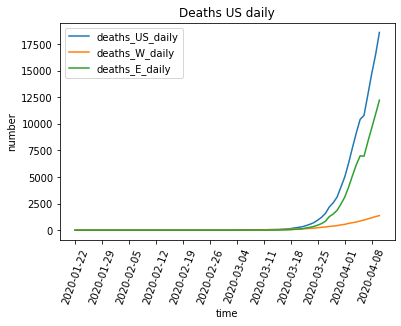

In [11]:
plt.figure()
plt.plot(deaths_US_daily,label='deaths_US_daily')
plt.plot(deaths_W_daily,label='deaths_W_daily')
plt.plot(deaths_E_daily,label='deaths_E_daily')

plt.xlabel("time")
plt.ylabel("number")
plt.xticks(range(0,80,7),rotation=70)
plt.title("Deaths US daily")
plt.legend()

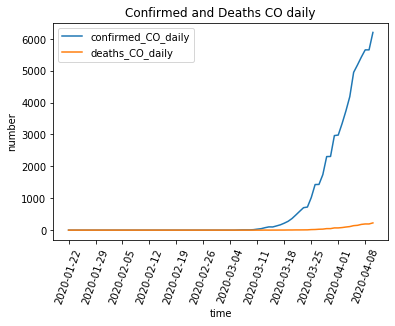

In [94]:
plt.figure()
plt.plot(confirmed_CO_daily,label='confirmed_CO_daily')
plt.plot(deaths_CO_daily,label='deaths_CO_daily')

plt.xlabel("time")
plt.ylabel("number")
plt.title("Confirmed and Deaths CO daily")
plt.xticks(range(0,80,7),rotation=70)
plt.legend()

# Analysis:


# Data Description 

### 1.Colorado data: daily confirmed cases and deaths in each county

In [12]:
data_CO.groupby(['Date','Admin2','Case_Type'])[['Cases']].sum()

Cases
Date       Admin2     Case_Type       
2020-01-22 Adams      Confirmed      0
                      Deaths         0
           Alamosa    Confirmed      0
                      Deaths         0
           Arapahoe   Confirmed      0
...                                ...
2020-04-10 Washington Deaths         0
           Weld       Confirmed    614
                      Deaths        30
           Yuma       Confirmed      2
                      Deaths         0

[10560 rows x 1 columns]

### 2.Colorado data: weekly confirmed cases and deaths in each county

In [13]:
data_CO['Date'] = pd.to_datetime(data_CO['Date'])
CO_weekly = data_CO[data_CO['Date'].isin(weekly)]

In [14]:
pvtable_CO = pd.pivot_table(data=CO_weekly, index=['Date','Admin2','Case_Type'], values=['Cases'], aggfunc='sum')
pvtable_CO

Cases
Date       Admin2     Case_Type       
2020-01-26 Adams      Confirmed      0
                      Deaths         0
           Alamosa    Confirmed      0
                      Deaths         0
           Arapahoe   Confirmed      0
...                                ...
2020-04-05 Washington Deaths         0
           Weld       Confirmed    470
                      Deaths        24
           Yuma       Confirmed      2
                      Deaths         0

[1452 rows x 1 columns]

In [15]:
CO_0410 = data_CO[data_CO['Date']=='2020-04-10']
US_0410 = data_US[data_US['Date']=='2020-04-10']
western_0410 = data_W[data_W['Date']=='2020-04-10']
eastern_0410 = data_E[data_E['Date']=='2020-04-10']

### 3.Colorado data: total confirmed cases and deaths in each county

In [16]:
CO_0410.groupby(['Admin2','Case_Type'])[['Cases']].sum()

Cases
Admin2     Case_Type       
Adams      Confirmed    475
           Deaths        14
Alamosa    Confirmed      5
           Deaths         0
Arapahoe   Confirmed    877
...                     ...
Washington Deaths         0
Weld       Confirmed    614
           Deaths        30
Yuma       Confirmed      2
           Deaths         0

[132 rows x 1 columns]

### 4.US data: total confirmed cases and deaths in each state 

In [17]:
US_0410.groupby(['Province_State','Case_Type'])[['Cases']].sum()

Cases
Province_State Case_Type       
Alabama        Confirmed   2947
               Deaths        80
Alaska         Confirmed    246
               Deaths         7
American Samoa Confirmed      0
...                         ...
West Virginia  Deaths         5
Wisconsin      Confirmed   3068
               Deaths       128
Wyoming        Confirmed    239
               Deaths         0

[112 rows x 1 columns]

In [86]:
confirmed_US_0410 = US_0410[US_0410['Case_Type']=='Confirmed']
confirmed_STATE_0410 = pd.pivot_table(data=confirmed_US_0410, 
                                      index=['Province_State'], values=['Cases'], aggfunc='sum')

In [101]:
import plotly.graph_objects as go

fig = go.Figure(data=go.Choropleth( 
    locations=confirmed_STATE_0410.index,
    z = confirmed_STATE_0410.values.astype(float), 
    locationmode = 'USA-states', 
    colorscale = 'Reds',
    colorbar_title = "number", 
)) 
 
fig.update_layout( 
    title_text = 'Confirmed in US', 
    geo_scope='usa', 
) 